In [4]:
!pip install graphviz
!pip install pydotplus
!pip install sklearn

  Stored in directory: /home/dsxuser/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import pydotplus

from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [12]:
#Load & Data Cleaning
csv_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(csv_path)
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

(169126, 38)

In [13]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


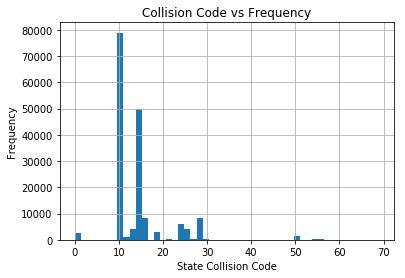

In [14]:
df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision Code vs Frequency")
plt.xlabel("State Collision Code")
plt.ylabel("Frequency")
plt.show()

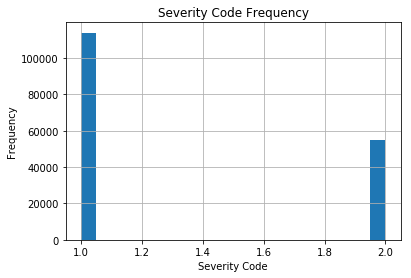

Actual values of the test cases: [2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2]


In [15]:
df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Code Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

X= df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

In [28]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_hat = clf_tree.predict(X_train)
scores["DT: F1-Score"] = f1_score(y_train, y_hat, average = "weighted")
scores["DT: Jaccard"] = jaccard_similarity_score(y_train, y_hat)
print("With Decision Tree model,it predicted values to be " + str(y_hat[0:20]))
scores

With Decision Tree model,it predicted values to be [2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


{'DT: F1-Score': 0.6902247634772901, 'DT: Jaccard': 0.7383739837398374}

In [44]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"],  
                     class_names='SEVERITYCODE',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"100, 100!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

Accuracy Test with K= 1 :  0.6806598474546207
Accuracy Test with K= 2 :  0.6862768284751375
Accuracy Test with K= 3 :  0.6859220717791048
Accuracy Test with K= 4 :  0.6885236208833442
Accuracy Test with K= 5 :  0.6829953290368356
Accuracy Test with K= 6 :  0.7241766688346243
Accuracy Test with K= 7 :  0.7247679299946787
Accuracy Test with K= 8 :  0.7271034115768935
Accuracy Test with K= 9 :  0.7274581682729262


Text(0, 0.5, 'Testing Accuracy')

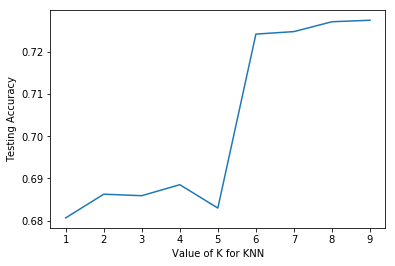

In [34]:
k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    y_hat = KNN.predict(X_test)
    print("Accuracy Test with K=", k, ": ", jaccard_similarity_score(y_test, y_hat))
    accuracy_score.append(jaccard_similarity_score(y_test, y_hat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [35]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))
print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_similarity_score(y, y_hat)))

Predicted values using k = 9: [1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 2]
KNN F1-Score: 0.6952661826753996
KNN Jaccard Score: 0.7204096354197462
